# Challenge Description
Company XYZ sells a software for $39. Since revenue has been flat for some time, the VP of Product has decided to run a test increasing the price. She hopes that this would increase revenue. In the experiment,

### 66% of the users have seen the old price (39.00), while 
### a random sample of 33% users a higher price (59.00).

The test has been running for *some time* and the VP of Product is interested in understanding how it went and whether it would make sense to increase the price for all the users. Especially she asked you the following questions:

## Should the company sell its software for 39 or 59?

The VP of Product is interested in having a holistic view into user behavior, especially focusing on actionable insights that might increase conversion rate. What are your main findings looking at the data?

# What might increase the conversion rate?
The VP of Product feels that the test has been running for too long and she should have been able to get statistically significant results in a shorter time. Do you agree with her intuition? After how many days would you have stopped the test? Please, explain why.

# 18C Data Challenge 2


# Two Tables Joinable

## Columns (in Table 1) Test_Results:

1.) user_id : the Id of the user. Can be joined to user_id in user_table

2.) timestamp : the date and time when the user hit for the first time company XYZ webpage. It is in user local time

3.) source : 

marketing channel that led to the user coming to the site.
   It can be:
            ads-["google", "facebook", "bing", "yahoo", "other"]. That is, user coming from google ads, yahoo    ads, etc.
            seo - ["google", "facebook", "bing", "yahoo", "other"]. That is, user coming from google search, yahoo, facebook, etc.

friend_referral : user coming from a referral link of another user

direct_traffic: user coming by directly typing the address of the site on the browser

4.) device : user device. Can be mobile or web

5.) operative_system : user operative system. Can be: "windows", "linux", "mac" for web, and "android", "iOS" for mobile. "Other" if it is none of the above

6.) test: whether the user was in the test (i.e. 1 -> higher price) or in control (0 -> old, lower price)

7.) price : the price the user sees. It should match test

8.) converted : whether the user converted (i.e. 1 -> bought the software) or not (0 -> left the site without buying it).

##  Table 2 "user_table" - Information about the user
### Columns: 

1.) user_id : the Id of the user. Can be joined to user_id in test_results table

2.) city : the city where the user is located. Comes from the user ip address

3.) country : in which country the city is located

4.) lat : city latitude - should match user city

5.) long : city longitude - should match user city


First read in the tables WIHTOUT specifying column names to make sure you know what columns should be there - regardless of what you were told in the prompt.

In [2]:
# read the data, set the column names, check out the head

#Insight data challenge 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs
plt.style.use('ggplot')
%matplotlib inline
pd.options.display.max_columns = 150


#Test results csv
url = 'https://raw.githubusercontent.com/InsightIDX/18C/master/data_challenge_2/test_results.csv?token=AX8jYSBt2d1RTlTd7DEGA3XEyQchxIlnks5cECgOwA%3D%3D'
#8 columns
colnames= ['user_id', 'timestamp', 'source','device', 'op_sys', 'test', 'price', 'converted']

test_data = pd.read_csv(url)
#user data csv
# 5 columns
url_2='https://raw.githubusercontent.com/InsightIDX/18C/master/data_challenge_2/user_table.csv?token=AX8jYYwGgjEGWDPLtamLmnEffPjm8ZbBks5cECgrwA%3D%3D'

colnames= ['user_id', 'city', 'country', 'lat', 'long']
user_data = pd.read_csv(url_2)
# header = 0 to use the first row as the header

display(test_data)
display(user_data)

num_tests = test_data.count()
num_users = user_data.count()
print("Number of tests:", str(num_tests))
print('Number of users:', str(num_users))

combined_data = pd.merge(test_data, user_data, on='user_id', how='outer')
num_combined = combined_data.count()
print('Number of combined:', str(num_combined))

,Unnamed: 0,user_id,timestamp,source,device,operative_system,test,price,converted
0,0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0
1,1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0
2,2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0
3,3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0
4,4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0
5,5,169971,2015-04-13 12:07:08,ads-google,mobile,iOS,0,39.0,0
6,6,600150,2015-03-04 14:45:44,seo_facebook,web,windows,0,39.0,0
7,7,798371,2015-03-15 08:19:29,ads-bing,mobile,android,1,59.0,1
8,8,447194,2015-03-28 12:28:10,ads_facebook,web,windows,1,59.0,0
9,9,431639,2015-04-24 12:42:18,ads_facebook,web,windows,1,59.0,0


,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68
5,229234,New York,USA,40.67,-73.94
6,339138,Durham,USA,35.98,-78.91
7,270353,New York,USA,40.67,-73.94
8,166748,Burke,USA,38.78,-77.27
9,167700,New York,USA,40.67,-73.94


Number of tests: Unnamed: 0          316800
user_id             316800
timestamp           316466
source              316488
device              316800
operative_system    296461
test                316800
price               316800
converted           316800
dtype: int64
Number of users: user_id    275616
city       275616
country    275616
lat        275616
long       275616
dtype: int64
Number of combined: Unnamed: 0          316800
user_id             316800
timestamp           316466
source              316488
device              316800
operative_system    296461
test                316800
price               316800
converted           316800
city                275616
country             275616
lat                 275616
long                275616
dtype: int64


In [3]:
#Check for nulls
errors_price_list = combined_data.loc[(combined_data['price'] != 39.0) & (combined_data['price'] != 59.0)]
display(errors_price_list)
errors_price_count = errors_price_list.count()
print(errors_price_count)
combined_data.info()

,Unnamed: 0,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
94,94,713483,2015-05-01 22:14:32,direct_traffic,web,mac,0,760350245.0,0,Cleveland,USA,41.48,-81.68
163,163,813855,2015-03-13 19:52:42,ads-bing,mobile,android,1,880279005.0,0,NaN,NaN,NaN,NaN
201,201,34593,2015-03-30 08:14:44,ads_other,web,windows,0,630429505.0,0,Sacramento,USA,38.57,-121.47
271,271,878231,2015-03-20 01:08:07,ads-bing,mobile,iOS,0,991021920.0,0,Houston,USA,29.77,-95.39
289,289,951988,2015-05-02 13:20:25,ads_facebook,web,windows,0,532089148.0,0,Jacksonville,USA,30.33,-81.66
403,403,839013,2015-03-06 10:52:08,ads_facebook,mobile,iOS,1,586982279.0,1,Eldersburg,USA,39.41,-76.94
425,425,589975,2015-04-26 08:54:42,ads_facebook,mobile,iOS,0,838114695.0,0,Rancho Cucamonga,USA,34.12,-117.57
517,517,298770,2015-05-18 12:54:04,ads-bing,mobile,android,0,991024673.0,0,Winston-Salem,USA,36.10,-80.26
548,548,165419,2015-04-10 04:29:28,friend_referral,web,windows,0,731608106.0,0,Detroit,USA,42.38,-83.10
600,600,53480,2015-05-22 06:54:28,ads_facebook,web,windows,0,582513317.0,0,Kennewick,USA,46.20,-119.17


Unnamed: 0          3074
user_id             3074
timestamp           3070
source              3071
device              3074
operative_system    2854
test                3074
price               3074
converted           3074
city                2675
country             2675
lat                 2675
long                2675
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 316800 entries, 0 to 316799
Data columns (total 13 columns):
Unnamed: 0          316800 non-null int64
user_id             316800 non-null int64
timestamp           316466 non-null object
source              316488 non-null object
device              316800 non-null object
operative_system    296461 non-null object
test                316800 non-null int64
price               316800 non-null float64
converted           316800 non-null int64
city                275616 non-null object
country             275616 non-null object
lat                 275616 non-null float64
long                275616 non-null f

In [6]:
# I could just drop all null values because this is a 3 hr challenge
combined_data=combined_data.dropna(axis=0)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257298 entries, 0 to 316799
Data columns (total 13 columns):
Unnamed: 0          257298 non-null int64
user_id             257298 non-null int64
timestamp           257298 non-null object
source              257298 non-null object
device              257298 non-null object
operative_system    257298 non-null object
test                257298 non-null int64
price               257298 non-null float64
converted           257298 non-null int64
city                257298 non-null object
country             257298 non-null object
lat                 257298 non-null float64
long                257298 non-null float64
dtypes: float64(3), int64(4), object(6)
memory usage: 27.5+ MB


/Users/whitneyreiner/anaconda3/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


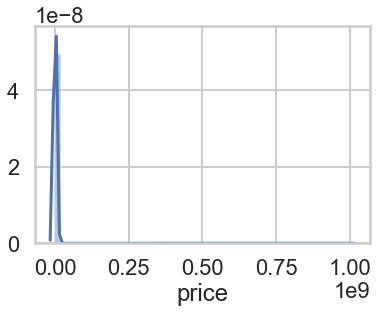

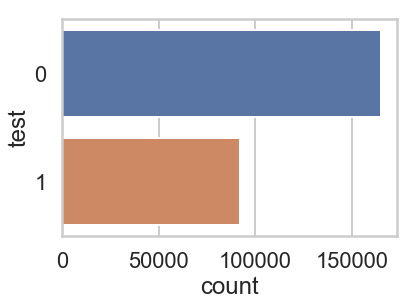

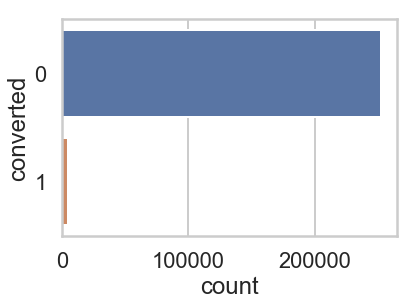

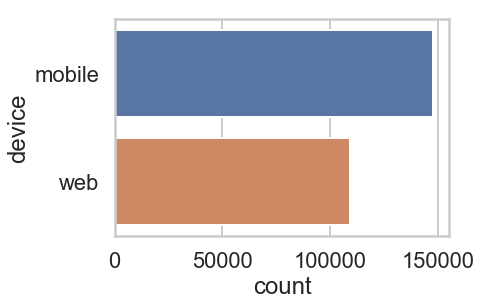

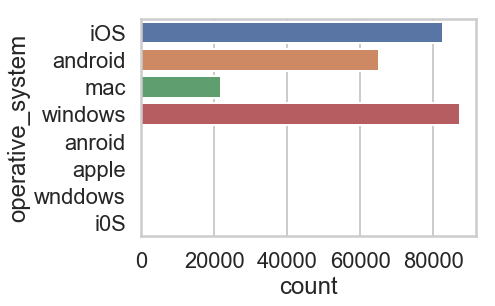

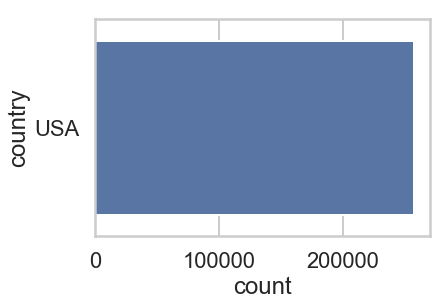

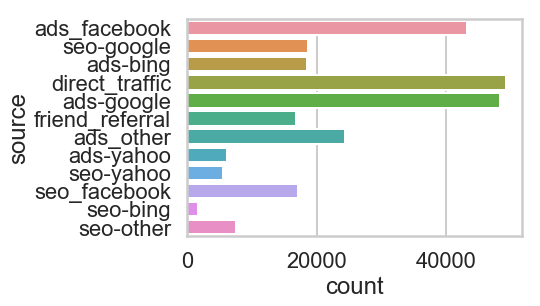

In [7]:
#Plot data to get a sense of it

#Basic plotting
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)
sns.despine()
sns.set_context("poster")

sns.distplot(combined_data['price'])
plt.show()

sns.countplot(y='test', data=combined_data)
plt.show()

sns.countplot(y='converted', data=combined_data)
plt.show()

sns.countplot(y='device', data=combined_data)
plt.show()

sns.countplot(y='operative_system', data=combined_data)
plt.show()

sns.countplot(y='country', data=combined_data)
plt.show()

sns.countplot(y='source', data=combined_data)
plt.show()

In [8]:
combined_data.info()
#supposedly no nulls now that I dropped all NA, but there could be null data that weren't automatically read as nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257298 entries, 0 to 316799
Data columns (total 13 columns):
Unnamed: 0          257298 non-null int64
user_id             257298 non-null int64
timestamp           257298 non-null object
source              257298 non-null object
device              257298 non-null object
operative_system    257298 non-null object
test                257298 non-null int64
price               257298 non-null float64
converted           257298 non-null int64
city                257298 non-null object
country             257298 non-null object
lat                 257298 non-null float64
long                257298 non-null float64
dtypes: float64(3), int64(4), object(6)
memory usage: 37.5+ MB


In [9]:
# Look at the unique values for each column to make sure they are not null
combined_data.user_id.nunique()

257298

In [10]:
#fix operative_system data
#check the unique values in the 'operative_system' and 'price' columns and make sure they make sense
combined_data.operative_system.unique()
#This is a problem, we have iOS and i0S (the number zero), change i0S to the letter O

array(['iOS', 'android', 'mac', 'windows', 'anroid', 'apple', 'wnddows',
       'i0S'], dtype=object)

In [11]:
combined_data['operative_system']=combined_data.operative_system.replace({'i0S': 'iOS'})
combined_data['operative_system']=combined_data.operative_system.replace({'wnddows': 'windows'})
combined_data['operative_system']=combined_data.operative_system.replace({'anroid': 'android'})
combined_data['operative_system']=combined_data.operative_system.replace({'apple': 'Other'})

In [12]:
combined_data.operative_system.unique()

array(['iOS', 'android', 'mac', 'windows', 'Other'], dtype=object)

In [15]:
#check the unique values in the 'price' columns and make sure they make sense
combined_data['price']=combined_data.price.astype(float)

In [16]:
combined_data.price.value_counts()
#not sure yet what to do wih these weird numbers

39.0           163348
59.0            91475
805207714.0         1
448168133.0         1
630429505.0         1
630215072.0         1
898549270.0         1
630082105.0         1
898428703.0         1
629406404.0         1
448920362.0         1
897796823.0         1
628875570.0         1
897198778.0         1
628552873.0         1
448485613.0         1
628403256.0         1
896788644.0         1
628147989.0         1
630535561.0         1
449622136.0         1
630819970.0         1
632314001.0         1
901773862.0         1
901760449.0         1
901524802.0         1
450720111.0         1
901389704.0         1
632620159.0         1
632506031.0         1
                ...  
486452926.0         1
352218777.0         1
704425062.0         1
972683748.0         1
972642791.0         1
704072571.0         1
972438527.0         1
703966246.0         1
972329412.0         1
972228771.0         1
704627103.0         1
352379433.0         1
487267965.0         1
973198087.0         1
974487016.

In [51]:
#Many of the prices are erroneous, drop these- they are all > 59.0
dataClean= combined_data[combined_data['price'] <= 59.0]
dataClean.price.value_counts()

39.0    163348
59.0     91475
Name: price, dtype: int64

In [52]:
#see if any of the prices are incorrect
# test ==1 should be 59.0 and test == 0 should be 39.0
dataClean=dataClean[(dataClean['test'] == 0) & (dataClean['price'] != 59.0)|(dataClean['test'] == 1) & (dataClean['price'] != 39.0)]


In [53]:
# check it
plt.figure(figsize=(10,10))
ax = sns.lineplot(x="Year", y="Global_Sales", hue="Genre",
                   data=df2)

,Unnamed: 0,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long


In [54]:
# check it
dataClean[(dataClean['test'] == 0) & (dataClean['price'] == 59.0)]

,Unnamed: 0,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long


In [55]:
dataClean.source.unique()
#This is okay but there are Nans

array(['ads_facebook', 'seo-google', 'ads-bing', 'direct_traffic',
       'ads-google', 'friend_referral', 'ads_other', 'ads-yahoo',
       'seo-yahoo', 'seo_facebook', 'seo-bing', 'seo-other'], dtype=object)

In [56]:
dataClean.device.unique() #this is okay

array(['mobile', 'web'], dtype=object)

In [57]:
dataClean.test.unique() #also okay

array([0, 1])

In [58]:
dataClean.converted.unique() #also okay

array([0, 1])

In [59]:
#sort then see if unique, name it something else to inspect
citydata= dataClean.city.sort_values()


In [60]:
citydata.unique() #looks okay for now but I didn't spend too much time on this

array(['Abilene', 'Akron', 'Alameda', 'Albany', 'Albuquerque',
       'Alexandria', 'Alhambra', 'Aliso Viejo', 'Allen', 'Allentown',
       'Aloha', 'Altadena', 'Altamonte Springs', 'Altoona', 'Amarillo',
       'Ames', 'Anaheim', 'Anchorage', 'Anderson', 'Andover', 'Ann Arbor',
       'Annandale', 'Antioch', 'Apple Valley', 'Appleton', 'Arcadia',
       'Arden-Arcade', 'Arlington', 'Arlington Heights', 'Arvada',
       'Asheville', 'Aspen Hill', 'Athens-Clarke', 'Atlanta',
       'Atlantic City', 'Attleboro', 'Auburn', 'Augusta-Richmond',
       'Aurora', 'Austin', 'Avondale', 'Azusa', 'Bakersfield',
       'Baldwin Park', 'Baltimore', 'Barnstable Town', 'Bartlett',
       'Baton Rouge', 'Battle Creek', 'Bayonne', 'Baytown', 'Beaumont',
       'Beavercreek', 'Beaverton', 'Bedford', 'Bel Air South',
       'Bell Gardens', 'Belleville', 'Bellevue', 'Bellflower',
       'Bellingham', 'Bend', 'Berkeley', 'Berwyn', 'Bethesda',
       'Bethlehem', 'Beverly', 'Billerica', 'Billings', 'Bingha

In [61]:
user_data.country.unique()
user_data.country.nunique() #all from usa
#so this column isn't needed and won't be helpful for modeling

1

In [62]:
#The coordinates are okay but change to floats so have the zeros etc.
dataClean[['lat','long']].astype(float)

,lat,long
0,42.89,-78.86
1,44.68,-93.24
2,41.38,-81.73
3,35.07,-78.90
4,39.95,-86.02
5,40.67,-73.94
7,40.77,-74.21
8,39.78,-84.20
9,37.53,-77.47
10,42.58,-83.27


In [63]:
#check dtypes
dataClean.info()
#good now you can join

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254534 entries, 0 to 316799
Data columns (total 13 columns):
Unnamed: 0          254534 non-null int64
user_id             254534 non-null int64
timestamp           254534 non-null object
source              254534 non-null object
device              254534 non-null object
operative_system    254534 non-null object
test                254534 non-null int64
price               254534 non-null float64
converted           254534 non-null int64
city                254534 non-null object
country             254534 non-null object
lat                 254534 non-null float64
long                254534 non-null float64
dtypes: float64(3), int64(4), object(6)
memory usage: 27.2+ MB


In [67]:
dataClean.columns

Index(['Unnamed: 0', 'user_id', 'timestamp', 'source', 'device',
       'operative_system', 'test', 'price', 'converted', 'city', 'lat',
       'long'],
      dtype='object')

In [68]:
#drop the country column becaus eyou don't need it
dataClean=dataClean.drop(['country'], axis=1)
#Drop the unnamed column but next time code that into the pd.read_csv line
dataClean=dataClean.drop(['Unnamed: 0'], axis=1)

dataClean.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0,Buffalo,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0,Lakeville,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0,Parma,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0,Fayetteville,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0,Fishers,39.95,-86.02


In [70]:
dataClean.columns

Index(['user_id', 'timestamp', 'source', 'device', 'operative_system', 'test',
       'price', 'converted', 'city', 'lat', 'long'],
      dtype='object')

In [106]:
#check out the data because the time stuff is weird
#df.to_csv('df_challenge2.csv', index=False, encoding='utf-8', date_format='%Y-%m-%d %I:%M:%S')

In [71]:
#change timestamp to dtype timestamp 
import datetime as dt

In [72]:
#Compare test to not test
#make a new dataframe with just test
df_test = dataClean[dataClean.test == 1]
df_test.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,lat,long
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0,Fayetteville,35.07,-78.90
7,798371,2015-03-15 08:19:29,ads-bing,mobile,android,1,59.0,1,East Orange,40.77,-74.21
8,447194,2015-03-28 12:28:10,ads_facebook,web,windows,1,59.0,0,Dayton,39.78,-84.20
9,431639,2015-04-24 12:42:18,ads_facebook,web,windows,1,59.0,0,Richmond,37.53,-77.47
15,552048,2015-03-22 08:58:32,ads-bing,web,windows,1,59.0,0,Culver City,34.01,-118.40


In [73]:
#how many were NOT converted of the test
num_not_conv_test= df_test[df_test.converted== 0].shape[0]
num_not_conv_test
#112300 of total 114073 in test were converted
#What is the %

89844

In [80]:
#% NOT converted 
test_total=df_test.shape[0]
pct_not_conv_test=(num_not_conv_test/test_total)*100
pct_not_conv_test

98.39555794061921

In [81]:
# converted of test?
num_conv_test= df_test[df_test.converted== 1].shape[0]
num_conv_test

1465

In [82]:
#% conversion rate of test
pct_conv_test=(num_conv_test/test_total)*100
pct_conv_test

1.604442059380784

In [83]:
#check by adding together
pct_conv_test+pct_not_conv_test

100.0

In [ ]:
#now do the same for the entire non-test group

In [84]:
#make a new df with just non-test
df_non_test = dataClean[dataClean.test == 0]
df_non_test.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0,Buffalo,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0,Lakeville,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0,Parma,41.38,-81.73
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0,Fishers,39.95,-86.02
5,169971,2015-04-13 12:07:08,ads-google,mobile,iOS,0,39.0,0,New York,40.67,-73.94


In [85]:
df_non_test.info()
df_non_test.shape
non_test_total=df_non_test.shape[0]
non_test_total

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163225 entries, 0 to 316798
Data columns (total 11 columns):
user_id             163225 non-null int64
timestamp           163225 non-null object
source              163225 non-null object
device              163225 non-null object
operative_system    163225 non-null object
test                163225 non-null int64
price               163225 non-null float64
converted           163225 non-null int64
city                163225 non-null object
lat                 163225 non-null float64
long                163225 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 14.9+ MB


163225

In [86]:
#how many were NOT converted of the non_test
num_not_conv_non_test= df_non_test[df_non_test.converted== 0].shape[0]
num_not_conv_non_test
#112300 of total 114073 in test were converted
#What is the %

159930

In [87]:
#% NOT converted 
pct_not_conv_non_test=(num_not_conv_non_test/non_test_total)*100
pct_not_conv_non_test

97.98131413692755

In [88]:
# converted of non_test?
num_conv_non_test= df_non_test[df_non_test.converted== 1].shape[0]
num_conv_non_test

3295

In [89]:
#% conversion rate of test
pct_conv_non_test=(num_conv_non_test/non_test_total)*100
pct_conv_non_test

2.018685863072446

In [90]:
#check by adding together
pct_conv_non_test+pct_not_conv_non_test

100.0

# Conversion rate for test = 1.6%
# Conversion rate for non-test = 2.0%
# Because these conversion rates are so similar, maybe it still makes sense to sell the product at a higher rate.

#But are there differences based on location? os? device? source? Let's make some plots to:
#Figure out how to segment user data

In [19]:
import pandas as pd
import numpy as np
import scipy.stats as scs

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [92]:
test_result = dataClean[['test', 'converted']]
test_result.head()

,test,converted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0


# Easier way to get the conversion rate!

In [93]:
# OG price (price of control group aka test == 0 in this dataset
old_price = test_result[test_result['test']==0]
old_price.info()
old_price.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163225 entries, 0 to 316798
Data columns (total 2 columns):
test         163225 non-null int64
converted    163225 non-null int64
dtypes: int64(2)
memory usage: 3.7 MB


,test,converted
0,0,0
1,0,0
2,0,0
4,0,0
5,0,0


In [94]:
#new price (price of test set, AKA test ==1 in this data set)
new_price = test_result[test_result['test']==1]
new_price.info()
new_price.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91309 entries, 3 to 316799
Data columns (total 2 columns):
test         91309 non-null int64
converted    91309 non-null int64
dtypes: int64(2)
memory usage: 2.1 MB


,test,converted
3,1,0
7,1,1
8,1,0
9,1,0
15,1,0


In [95]:
old_site = old_price['converted'].values
# array of the control group with 1s for converted and 0s for not

In [96]:
old_site

array([0, 0, 0, ..., 0, 0, 0])

In [97]:
new_site = new_price['converted'].values
# array of the test group with 1s for converted and 0s for not

In [98]:
new_site

array([0, 1, 0, ..., 0, 0, 0])

In [101]:
print(sum(old_site)) #total converted (add all the 1s and 0s) in control group
print(len(old_site)) #total num in control group
print(sum(new_site)) #total converted (add all the 1s and 0s) in test group
print(len(new_site)) #total num in test group

print('Old site conversion rate: {}'.format(sum(old_site)/len(old_site))) #converstion rate for control
print('New site conversion rate: {}'.format(sum(new_site)/len(new_site))) #conversion rate for test

3295
163225
1465
91309
Old site conversion rate: 0.02018685863072446
New site conversion rate: 0.01604442059380784


In [ ]:
# Visualize the distributions of the conversion rates w/r/t control and test groups

In [102]:
# Function to visualize distributions
def plot_with_fill(x, y, label):
    lines = plt.plot(x, y, label=label, lw=2)
    plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_c())
    plt.legend(loc='best',  fontsize='medium',) #loc='best' is another option

In [103]:
'''To get pdf for beta distribution
PDF is a function, whose value at any given sample (or point) in the sample space 
(the set of possible values taken by the random variable) can be interpreted as providing 
a relative likelihood that the value of the random variable would equal that sample.
'''
def get_pdf(x, site):
    ''' 
    Parameters
    -----------
    x : Array of x values
    site : Array cooresponding to the site in question

    Returns
    --------
    numpy array
    '''
    alpha = sum(site)
    beta = len(site) - alpha
    return scs.beta(a=alpha, b=beta).pdf(x)


Text(0.5, 0, 'Conversion Rate')

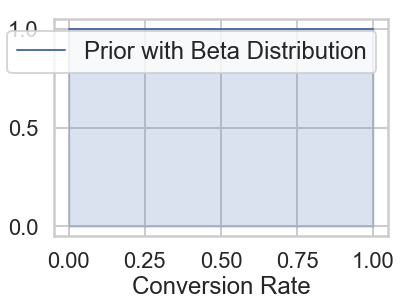

In [104]:
x = np.arange(0, 1.001, 0.001) #100 points from 0 to 1
y_prior = scs.beta(a=1, b=1).pdf(x)
plot_with_fill(x, y_prior, 'Prior with Beta Distribution')
plt.xlabel('Conversion Rate')

Text(0.5, 0, 'Conversion Rate')

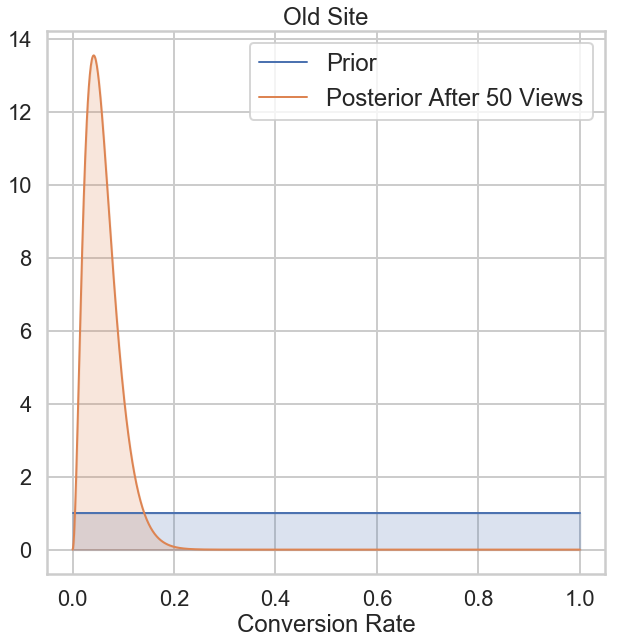

In [108]:
plt.figure(figsize=(10,10))
# Plot posterior after first 50 views of old site
y_50a = get_pdf(x, old_site[:50])

plot_with_fill(x, y_prior, 'Prior')
plot_with_fill(x, y_50a, 'Posterior After 50 Views')
plt.title('Old Site')
plt.xlabel('Conversion Rate')


In [109]:
# Graph multiple views
views = [50, 100, 200, 400, 800]

# Create our y_a for each view count in views
y_a = [get_pdf(x, old_site[:view]) for view in views]

# Create the labels for passing to the plot_with_fill function
labels = ['Posterior After {} Views'.format(view) for view in views]


(0, 0.15)

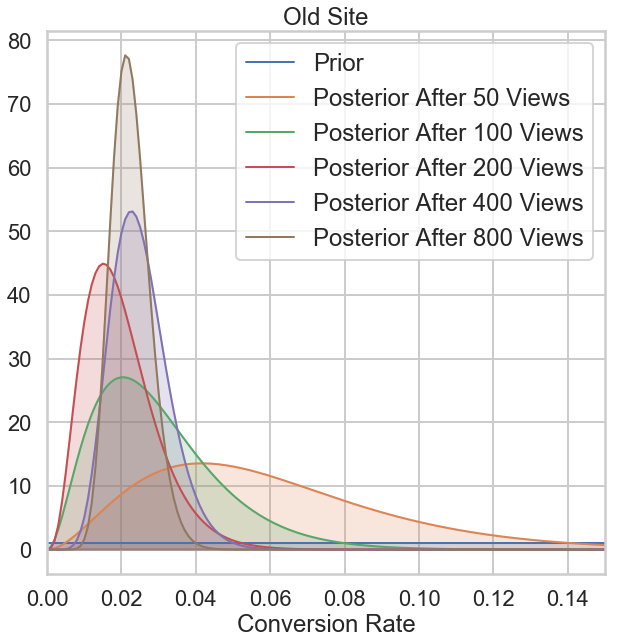

In [111]:
plt.figure(figsize=(10,10))
# Plot all these at once
plot_with_fill(x, y_prior, 'Prior')
for y, label in zip(y_a, labels):
    plot_with_fill(x, y, label)
plt.title('Old Site')
plt.xlabel('Conversion Rate')
plt.xlim([0, 0.15])

(0, 0.15)

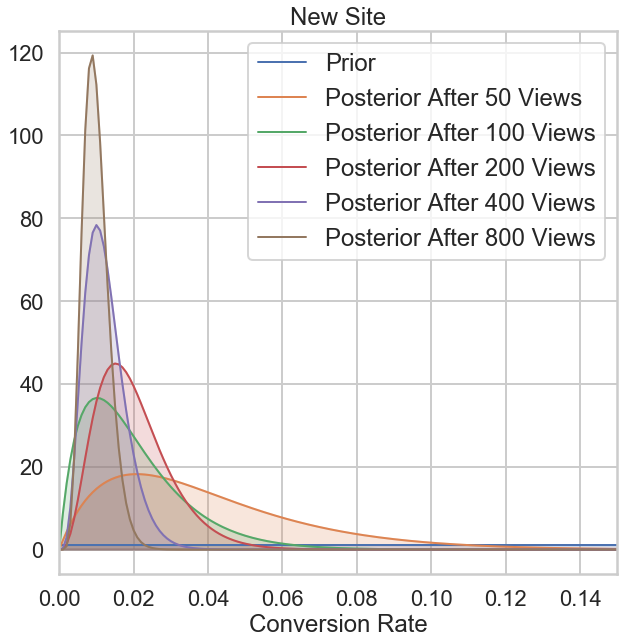

In [113]:
#Same thing for new site 
plt.figure(figsize=(10,10))
y_b = [get_pdf(x, new_site[:view]) for view in views]
labels = ['Posterior After {} Views'.format(view) for view in views]

plot_with_fill(x, y_prior, 'Prior')
for y, label in zip(y_b, labels):
    plot_with_fill(x, y, label)
plt.title('New Site')
plt.xlabel('Conversion Rate')
plt.xlim([0, 0.15])


Text(0.5, 0, 'Conversion Rate')

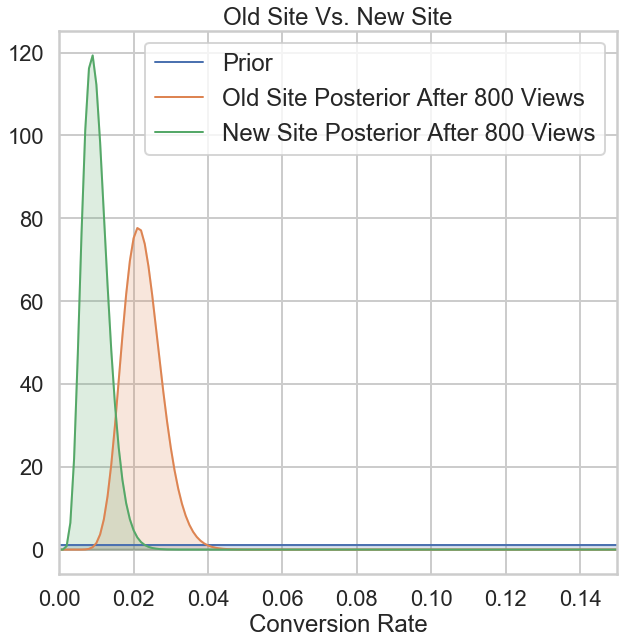

In [114]:
# Compare conversion rates after 800 views
plt.figure(figsize=(10,10))
y_a = get_pdf(x, old_site[:800])
y_b = get_pdf(x, new_site[:800])

plot_with_fill(x, y_prior, 'Prior')
plot_with_fill(x, y_a, 'Old Site Posterior After 800 Views')
plot_with_fill(x, y_b, 'New Site Posterior After 800 Views')

plt.xlim(0, 0.15)
plt.title('Old Site Vs. New Site')
plt.xlabel('Conversion Rate')

Text(0.5, 0, 'Conversion Rate')

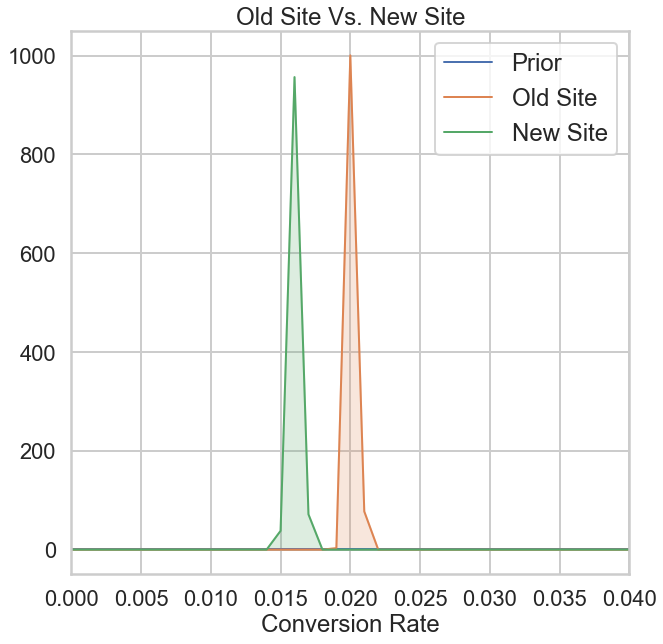

In [115]:
# Compare conversion rates overall
plt.figure(figsize=(10,10))
y_a = get_pdf(x, old_site)
y_b = get_pdf(x, new_site)

plot_with_fill(x, y_prior, 'Prior')
plot_with_fill(x, y_a, 'Old Site')
plot_with_fill(x, y_b, 'New Site')

plt.xlim(0, 0.04)
plt.title('Old Site Vs. New Site')
plt.xlabel('Conversion Rate')

To see the probability that the (new) test price outperforms the control(old) price:
* Run a simulation:
* draw 10,000 points from each distribution
* Count the number of times that what we drew from old site's distribution > than what we drew from new site's distribution.
* Divide by 10,000 to get the percent likelihood that new site is better than old site

In [119]:
a_sample = np.random.beta(a=sum(old_site), b=len(old_site)-sum(old_site), size=10000)
b_sample = np.random.beta(a=sum(new_site), b=len(new_site)-sum(new_site), size=10000)

# Now let's get the percentage of the time that the draw from Site B
# is larger than the draw from Site A
prob = (b_sample > a_sample).mean() * 100
print(
    'There is a {:.2f}% probability that the new site is better than the old site'.format(prob))

There is a 0.00% probability that the new site is better than the old site


There is a 0.00% probability that the new site is better than the old site
Seems that old site > new. This makes sense given the conversion rate graph above.
However 1 conversion in the new site results in $20 profit...
Calculate expected profit differences between each site.

In [120]:
expect_a = a_sample.mean()

In [121]:
expect_b = b_sample.mean()

In [122]:
def expected_profit_difference(hits, expect_a, expect_b):
    ''' Returns the expected profit from switching from A to B

    Parameters
    -----------
    hits : int number of clicks you expect your site to recieve
    expect_a : Expected value of old site
    expect_b : Expected value of new site

    Returns
    --------
    profit : float
    '''
    return expect_b * 20.00 * hits - expect_a * 1.00 * hits

In [123]:
hits = [100 * 10**p for p in range(6)]
diffs = [expected_profit_difference(hit, expect_a, expect_b) for hit in hits]
for hit, diff in zip(hits, diffs):
    print("Expected difference of ${:.2f} for {} hits".format(diff, hit))

Expected difference of $30.07 for 100 hits
Expected difference of $300.66 for 1000 hits
Expected difference of $3006.56 for 10000 hits
Expected difference of $30065.57 for 100000 hits
Expected difference of $300655.71 for 1000000 hits
Expected difference of $3006557.10 for 10000000 hits


Even though the old site's conversion rate is lower, the profit per hit justifies increasing the sale price.

The VP of Product is also correct in thinking that she would be able to get results in a shorter amount of time.

Using a Bayesian approach, it is clear that even though the old site is better when it comes to raw conversion rate, the bottom-line (profit) is more important. The profit of the new site conversion justifies the increase in price after around 800 visits.

In [ ]:
#Using a Frequentist's approach, we would have waited for ~300,000 visits to the site to obtain a result.